In [7]:
import numpy as np
import xarray as xr

import xdas
import xdas.signal as xp


class TestSignal:
    def test_get_sample_spacing(self):
        s = (5.0 / 2) + 5.0 * np.arange(100)
        dt = np.timedelta64(8, "ms")
        t = np.datetime64(0, "s") + dt * np.arange(1000)
        da = xr.DataArray(np.ones((len(t), len(s))), {"time": t, "distance": s})
        assert xp.get_sampling_interval(da, "time") == 0.008
        assert xp.get_sampling_interval(da, "distance") == 5.0
        shape = (6000, 1000)
        resolution = (np.timedelta64(8, "ms"), 5.0)
        starttime = np.datetime64("2023-01-01T00:00:00")
        db = xdas.Database(
            data=np.random.randn(*shape).astype("float32"),
            coords={
                "time": {
                    "tie_indices": [0, shape[0] - 1],
                    "tie_values": [
                        starttime,
                        starttime + resolution[0] * (shape[0] - 1),
                    ],
                },
                "distance": {
                    "tie_indices": [0, shape[1] - 1],
                    "tie_values": [0.0, resolution[1] * (shape[1] - 1)],
                },
            },
        )
        assert xp.get_sampling_interval(db, "time") == 0.008
        assert xp.get_sampling_interval(db, "distance") == 5.0

    def test_deterend(self):
        n = 100
        d = 5.0
        s = d * np.arange(n)
        da = xr.DataArray(np.arange(n), {"time": s})
        db = xdas.Database.from_xarray(da)
        da = xp.detrend(da)
        assert np.allclose(da, np.zeros(n))
        db = xp.detrend(db)
        assert np.allclose(db.values, np.zeros(n))

    def test_differentiate(self):
        n = 100
        d = 5.0
        s = (d / 2) + d * np.arange(n)
        da = xr.DataArray(np.ones(n), {"distance": s})
        db = xdas.Database.from_xarray(da)
        da = xp.differentiate(da, midpoints=True)
        assert np.allclose(da, np.zeros(n - 1))
        db = xp.differentiate(db, midpoints=True)
        assert np.allclose(db.values, np.zeros(n - 1))

    def test_integrate(self):
        n = 100
        d = 5.0
        s = (d / 2) + d * np.arange(n)
        da = xr.DataArray(np.ones(n), {"distance": s})
        db = xdas.Database.from_xarray(da)
        da = xp.integrate(da, midpoints=True)
        assert np.allclose(da, da["distance"])
        db = xp.integrate(db, midpoints=True)
        assert np.allclose(db.values, db["distance"].values)

    def test_segment_mean_removal(self):
        n = 100
        d = 5.0
        s = (d / 2) + d * np.arange(n)
        limits = [0, 0.3 * n * d, n * d]
        s = np.linspace(0, 1000, n)
        data = np.zeros(n)
        da = xr.DataArray(data, {"distance": s})
        da.loc[{"distance": slice(limits[0], limits[1])}] = 1.0
        da.loc[{"distance": slice(limits[1], limits[2])}] = 2.0
        db = xdas.Database.from_xarray(da)
        da = xp.segment_mean_removal(da, limits)
        assert np.allclose(da, 0)
        db = xp.segment_mean_removal(db, limits)
        assert np.allclose(db.values, 0)

    def test_sliding_window_removal(self):
        n = 100
        d = 5.0
        s = (d / 2) + d * np.arange(n)
        s = np.linspace(0, 1000, n)
        data = np.ones(n)
        da = xr.DataArray(data, {"distance": s})
        db = xdas.Database.from_xarray(da)
        da = xp.sliding_mean_removal(da, 0.1 * n * d)
        assert np.allclose(da, 0)
        db = xp.sliding_mean_removal(db, 0.1 * n * d)
        assert np.allclose(db.values, 0)

    def test_multithreaded_concatenate(self):
        arrays = [np.random.rand(100, 20) for _ in range(100)]
        expected = np.concatenate(arrays)
        result = xp.multithreaded_concatenate(arrays)
        assert np.array_equal(expected, result)
        expected = np.concatenate(arrays, axis=1)
        result = xp.multithreaded_concatenate(arrays, axis=1)
        assert np.array_equal(expected, result)

    def test_filters(self):
        from xdas.synthetics import generate
        db=generate()

    #  >>> import numpy as np
    # >>> import xdas as xs
    # >>> from scipy import signal

    # Create dummy time-series
    # >>> rng = np.random.default_rng()
    # >>> t = np.linspace(-1, 1, 201)
    # >>> x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
    # ...      0.1*np.sin(2*np.pi*1.25*t + 1) +
    # ...      0.18*np.cos(2*np.pi*3.85*t))
    # >>> xn = x + rng.standard_normal(len(t)) * 0.08
    # >>> shape=xn.shape()
    # >>> db = xdas.Database(xn,{"time":t})

    # Create an order 3 lowpass butterworth filter:
    # fs = 1.0 / get_sampling_interval(db, dim)
    # >>> sos = signal.butter(3, 0.05,output='sos')
    # >>> z = xp.sosfiltfilt(sos, db, dim, parallel=None)
        
        sos = signal.butter(3, 0.05,output='sos')
        z = xp.sosfiltfilt(sos, db, 'time', parallel=None)
        
    


(300, 401)


Text(0.5, 1.0, 'filtfilt')

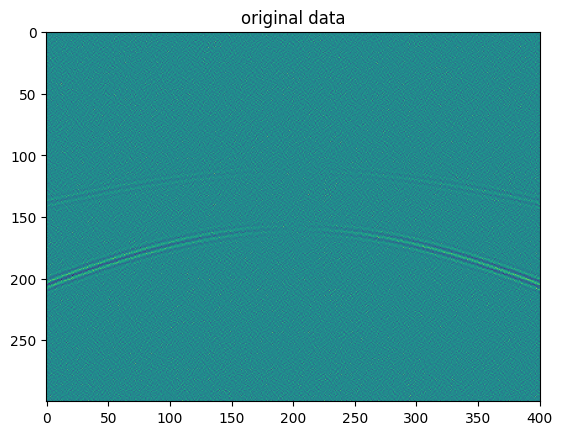

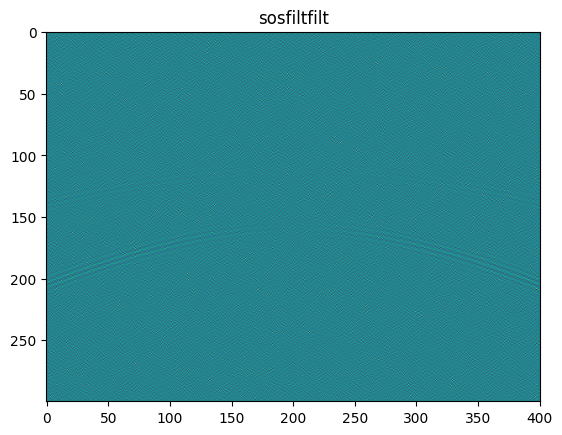

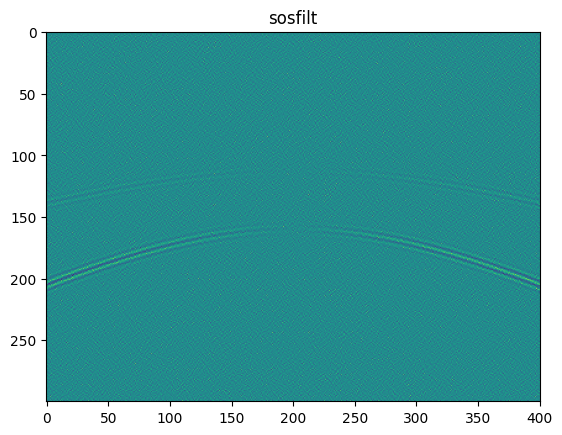

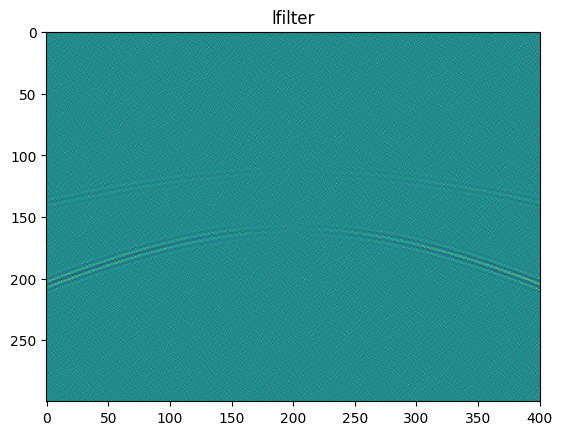

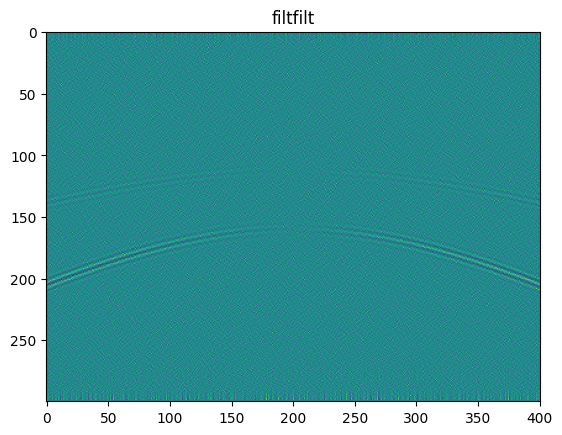

In [8]:
import matplotlib.pyplot as plt
from xdas.synthetics import generate
db=generate()
from scipy import signal

print(db.shape)

    #  >>> import numpy as np
    # >>> import xdas as xs
    # >>> from scipy import signal

    # Create dummy time-series
    # >>> rng = np.random.default_rng()
    # >>> t = np.linspace(-1, 1, 201)
    # >>> x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
    # ...      0.1*np.sin(2*np.pi*1.25*t + 1) +
    # ...      0.18*np.cos(2*np.pi*3.85*t))
    # >>> xn = x + rng.standard_normal(len(t)) * 0.08
    # >>> shape=xn.shape()
    # >>> db = xdas.Database(xn,{"time":t})

    # Create an order 3 lowpass butterworth filter:
    # fs = 1.0 / get_sampling_interval(db, dim)
    # >>> sos = signal.butter(3, 0.05,output='sos')
    # >>> z = xp.sosfiltfilt(sos, db, dim, parallel=None)
        
sos = signal.butter(3, 0.5,'highpass',output='sos')
z = xp.sosfiltfilt(sos, db, 'time', parallel=None)
plt.figure()
plt.imshow(db)
plt.title('original data')

sos = signal.butter(3, 0.05,'highpass',output='sos')
z = xp.sosfiltfilt(sos, db, 'time', parallel=None)
plt.figure()
plt.imshow(z)
plt.title('sosfiltfilt')

sos = signal.butter(3, 0.05,'highpass',output='sos')
z1 = xp.sosfilt(sos, db, 'time', parallel=None)
plt.figure()
plt.imshow(z1)
plt.title('sosfilt')

b,a = signal.butter(3, 0.05,'highpass')
z2 = xp.lfilter(b, a, db, 'time', parallel=None)
plt.figure()
plt.imshow(z2)
plt.title('lfilter')

b,a = signal.butter(3, 0.05,'highpass')
z3 = xp.filtfilt(b, a, db, 'time', parallel=None)
plt.figure()
plt.imshow(z3)
plt.title('filtfilt')
